**Meredith Green**

Spring 2022

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Notes

Only the following "high level" `scipy`/`numpy` functions were used:

- `np.linalg.eig`


## Task 1: Principal component analysis using the covariance matrix

### 1a) Import Iris data

In [2]:
#load iris into data frame
iris_df = pd.read_csv("data/iris.csv")

#print head
print(iris_df.head())

#create pca_cov object
pca = pca_cov.PCA_COV(iris_df)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


### 1b) Implement PCA


#### (i) Test `covariance_matrix`

In [3]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [4]:
# Testing prop_var 
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [5]:
# Tests accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [6]:
# Tests pca (no normalization) here
iris_headers = list(iris_df.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [172]:
# Tests pca (normalization) here
iris_headers = list(iris_df.columns[:-1])
pca.pca(iris_headers, normalize=True)

# tests that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualizes the cumulative proportion variance accounted for by the first $k$ principal components.


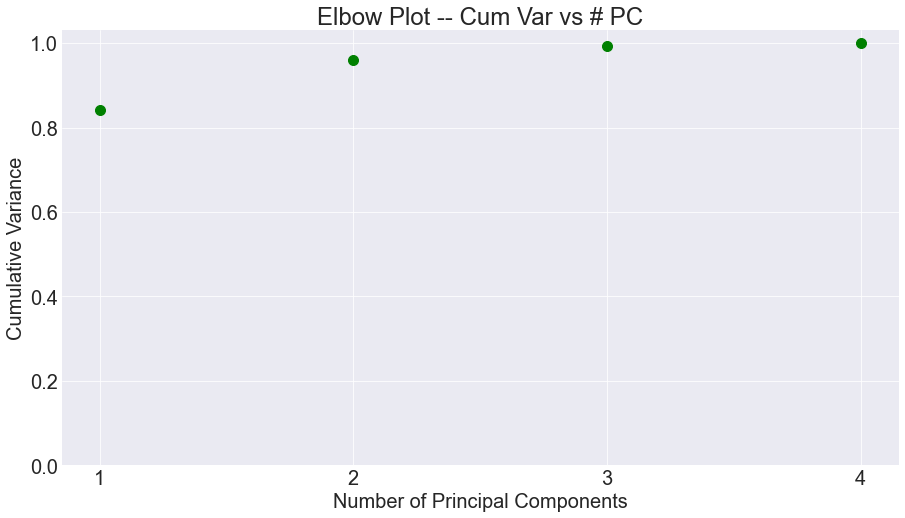

In [173]:
# test elbow plot
pca.elbow_plot()
plt.show()

#### (vi) Test `pca_project`

Projects the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [9]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plotting PCA projected Iris data

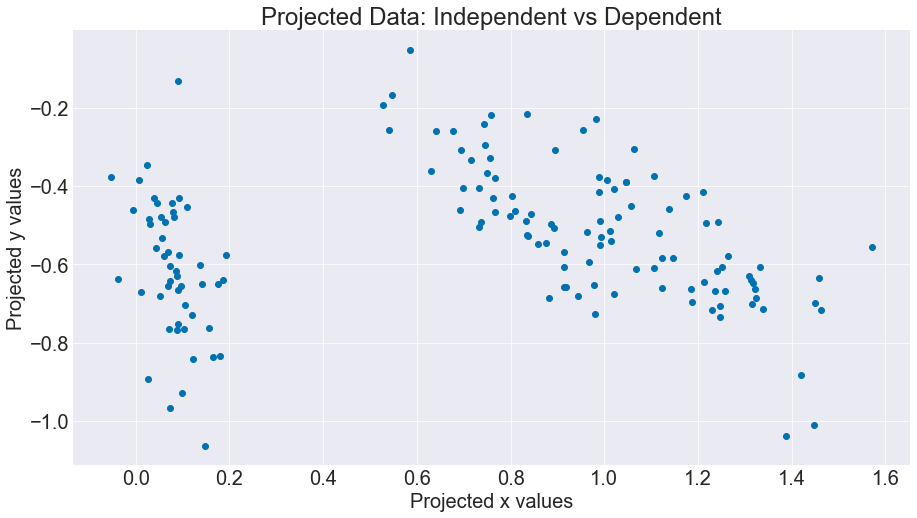

In [10]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)

#plotting cumulative sums
ax1.scatter(iris_proj[:,0], iris_proj[:,1])


#x and y labels
ax1.set_xlabel('Projected x values')
ax1.set_ylabel('Projected y values')
ax1.set_title('Projected Data: Independent vs Dependent')
plt.show()

### 1c) Dropping different pairs of principal components

The 2x2 plots:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

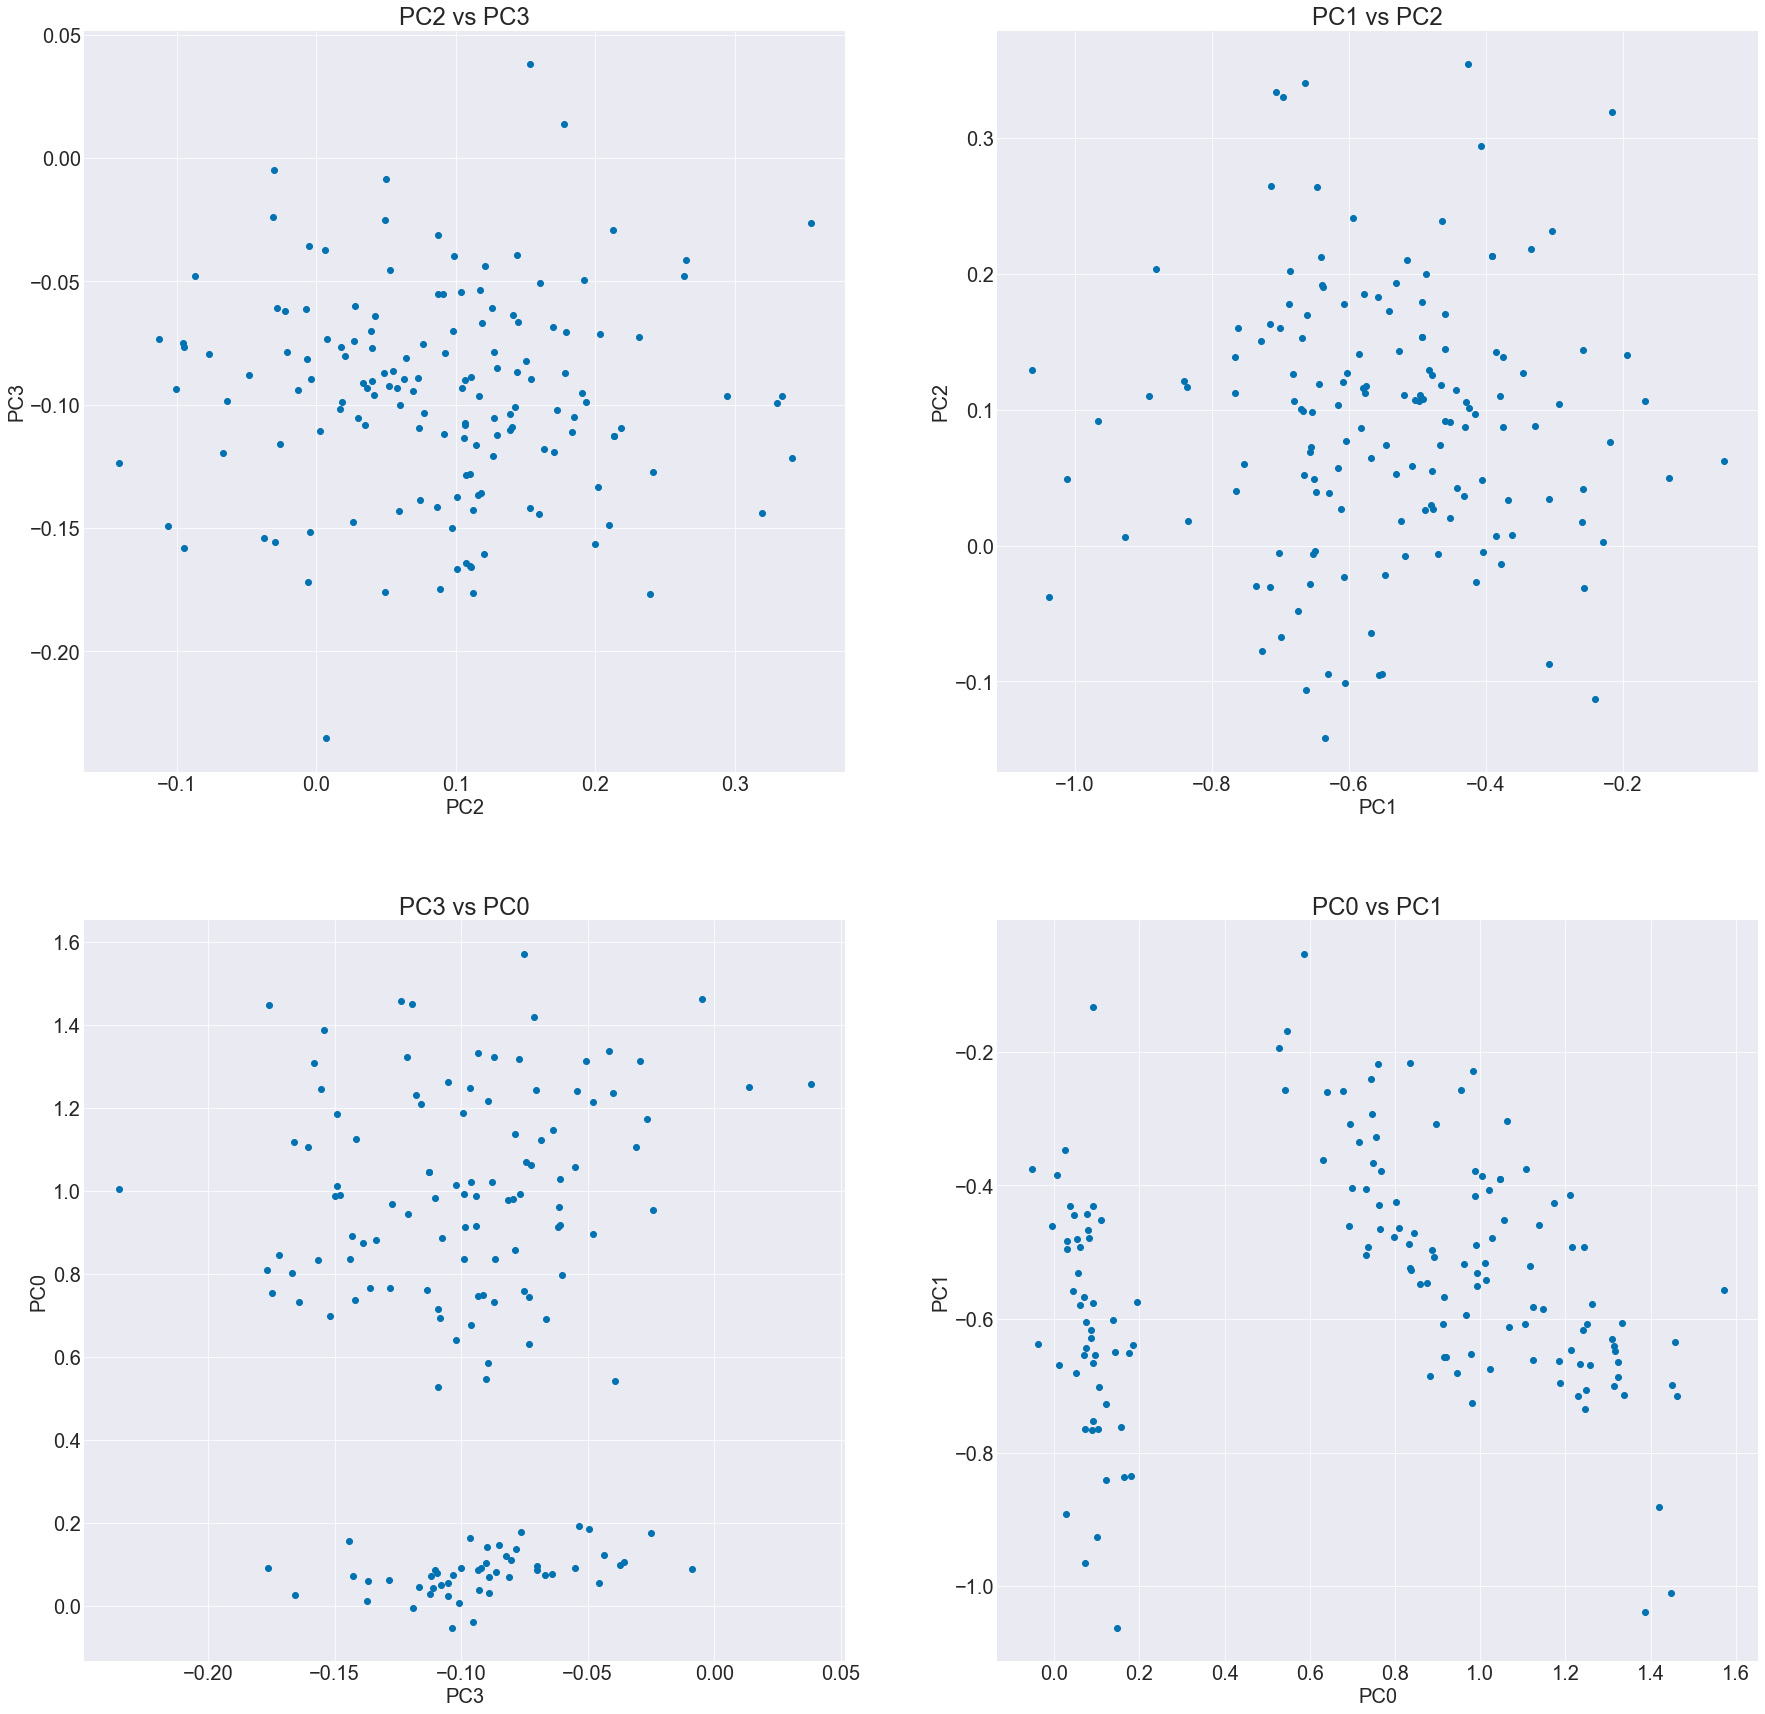

In [11]:
#doing pca_project

#top left
iris_projtl = pca.pca_project([2,3])
#top right
iris_projtr = pca.pca_project([1,2])
#bottom left
iris_projbl = pca.pca_project([3,0])
#bottom right
iris_projbr = pca.pca_project([0,1])

#plotting

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize = (30,30))

#top left
ax[0,0].scatter(iris_projtl[:,0], iris_projtl[:,1])
ax[0,0].set_title("PC2 vs PC3")
ax[0,0].set_ylabel("PC3")
ax[0,0].set_xlabel("PC2")

#top right
ax[0,1].scatter(iris_projtr[:,0], iris_projtr[:,1])
ax[0,1].set_title("PC1 vs PC2")
ax[0,1].set_ylabel("PC2")
ax[0,1].set_xlabel("PC1")

#bottom left
ax[1,0].scatter(iris_projbl[:,0], iris_projbl[:,1])
ax[1,0].set_title("PC3 vs PC0")
ax[1,0].set_ylabel("PC0")
ax[1,0].set_xlabel("PC3")

#bottom right
ax[1,1].scatter(iris_projbr[:,0], iris_projbr[:,1])
ax[1,1].set_title("PC0 vs PC1")
ax[1,1].set_ylabel("PC1")
ax[1,1].set_xlabel("PC0")

plt.show()

### 1e) Reconstruct data based on PCs

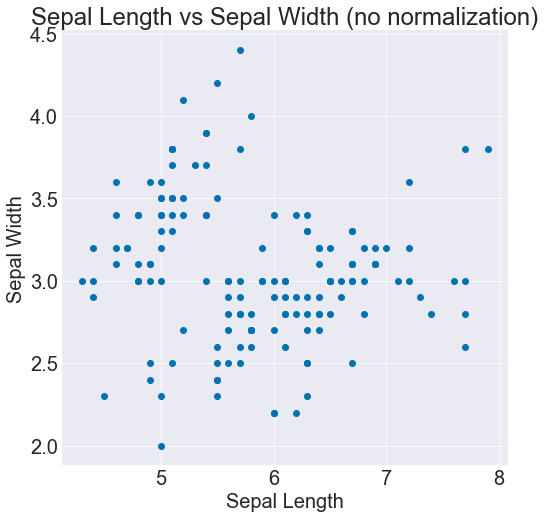

In [12]:
# Plot original iris data
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

iris_df = pd.read_csv("data/iris.csv")
pca = pca_cov.PCA_COV(iris_df)
ax1.scatter(pca.data["sepalLength"], pca.data["sepalWidth"])

#x and y labels
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_title('Sepal Length vs Sepal Width (no normalization)')
plt.show()

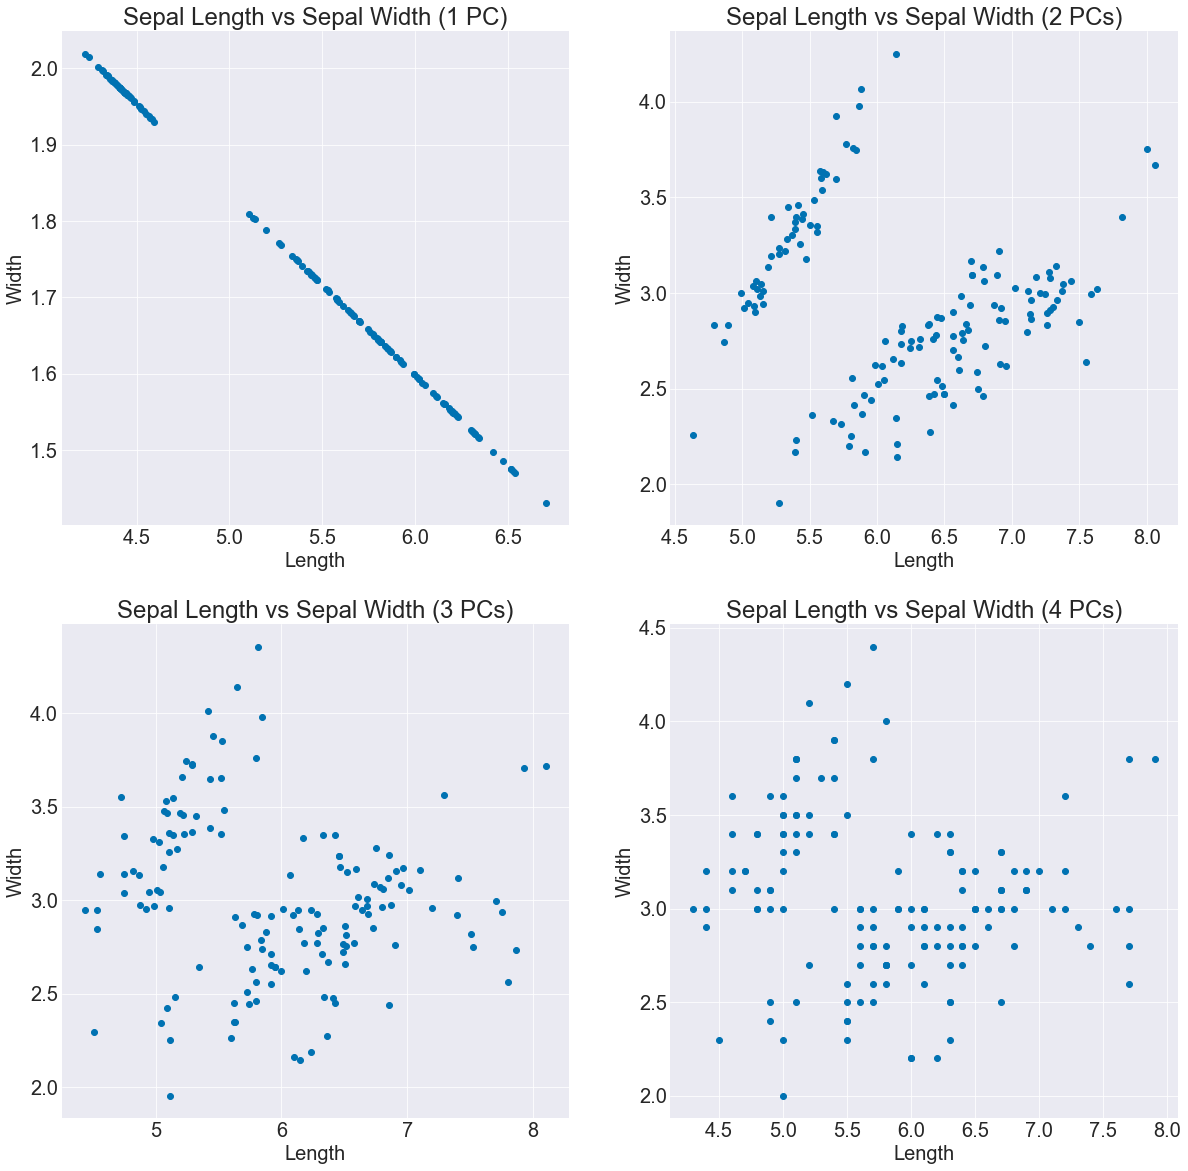

In [13]:
# 2x2 grid of scatter plots
#doing pca_project

iris_df = pd.read_csv("data/iris.csv")
pca1 = pca_cov.PCA_COV(iris_df)
pca2 = pca_cov.PCA_COV(iris_df)
pca3 = pca_cov.PCA_COV(iris_df)
pca4 = pca_cov.PCA_COV(iris_df)
iris_headers = list(iris_df.columns[:-1])
pca1.pca(iris_headers, normalize=True)
pca2.pca(iris_headers, normalize=True)
pca3.pca(iris_headers, normalize=True)
pca4.pca(iris_headers, normalize=True)

#top left
pca1.pca_project([0])
#top right
pca2.pca_project([0,1])
#bottom left
pca3.pca_project([0,1,2])
#bottom right
pca4.pca_project([0,1,2,3])

tl = pca1.pca_then_project_back(1)
tr = pca2.pca_then_project_back(2)
bl = pca3.pca_then_project_back(3)
br = pca4.pca_then_project_back(4)

#plotting

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize = (20,20))

#top left
ax[0,0].scatter(tl[:,0], tl[:,1])
ax[0,0].set_title("Sepal Length vs Sepal Width (1 PC)")
ax[0,0].set_ylabel("Width")
ax[0,0].set_xlabel("Length")

#top right
ax[0,1].scatter(tr[:,0], tr[:,1])
ax[0,1].set_title("Sepal Length vs Sepal Width (2 PCs)")
ax[0,1].set_ylabel("Width")
ax[0,1].set_xlabel("Length")

#bottom left
ax[1,0].scatter(bl[:,0], bl[:,1])
ax[1,0].set_title("Sepal Length vs Sepal Width (3 PCs)")
ax[1,0].set_ylabel("Width")
ax[1,0].set_xlabel("Length")

#bottom right
ax[1,1].scatter(br[:,0], br[:,1])
ax[1,1].set_title("Sepal Length vs Sepal Width (4 PCs)")
ax[1,1].set_ylabel("Width")
ax[1,1].set_xlabel("Length")

plt.show()


**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

With four PCs, seemingly all of the information is preserved. When we move to 3 PCs, we can still see the general shape of the data, however it is slightly different than with 4 PCs. The separation into groups is slightly more apparently. This separation continues to grow as we look at the graph with 2 PCs. Here, data does not look much like the original data, however there is some resemblance. There are two very distinct groups. With only one PC, we see a line, which therefore does not look like the orignal data. This line does preserve the two groups that have been distinguished. 



## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

In [14]:
import zipfile
import io

with zipfile.ZipFile('data/lfwcrop.npy.zip') as z:
    face_imgs =  np.load(io.BytesIO(z.read('lfwcrop.npy')))
    # print(face_imgs.shape)

face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\n')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

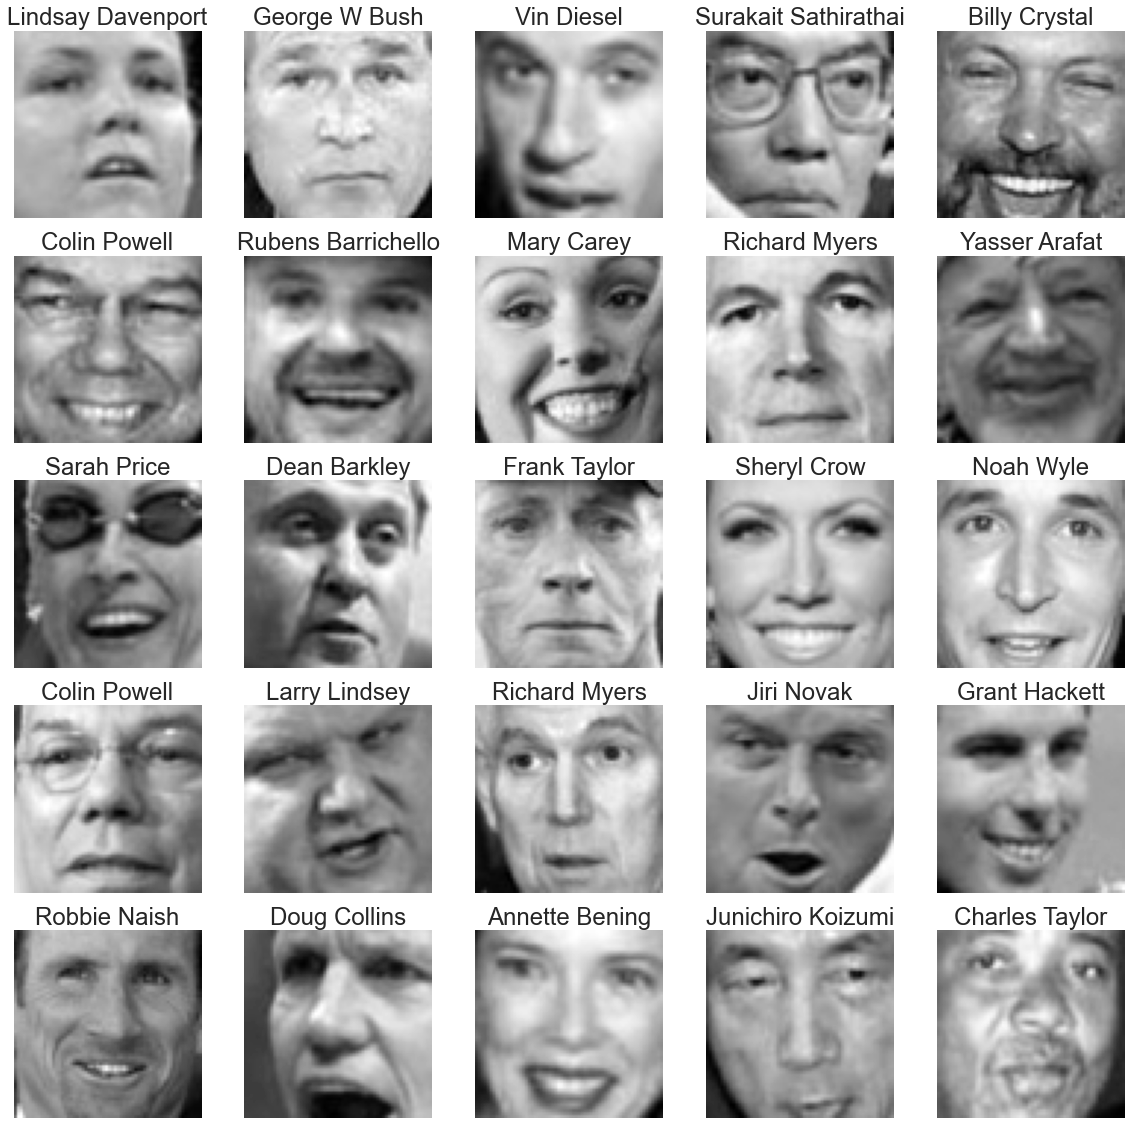

In [206]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.

    refered to day 19 for imshow
    '''

    subcounter = 0
    fig, ax = plt.subplots(5,5, sharex=False, sharey=False, figsize = (20,20))
    for row in range(5):
        for col in range(5):
            ax[row,col].imshow(face_imgs[subcounter], cmap=plt.get_cmap('gray'))
            ax[row,col].set_title(face_names[subcounter])
            ax[row,col].set_yticks([])
            ax[row,col].set_xticks([])
            subcounter+=1
    
    plt.show()


face_plot(face_imgs, face_names)

### 2c) Visualize the "mean face"

- Taking the mean face image across the dataset and showing it below.

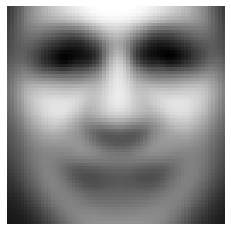

In [188]:
# print(face_imgs.shape)

mean_face = np.zeros((64,64))
#iterating through pixels
for row in range(64):
    for col in range(64):
        sum = 0
        #iterating through the iamges to get the average
        for pic in range(len(face_imgs)):
            sum+=face_imgs[pic, row, col]
        #assigning mean for that pixel
        mean_face[row,col] = sum/len(face_imgs)

#showing mean face
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))

plt.yticks([])
plt.xticks([])
plt.show()

### 2d) Preprocess face data


In [207]:
# Your reshape code here
face_imgs_vec = face_imgs.reshape((face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2]))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data


In [208]:
import time

face_df = pd.DataFrame(face_imgs_vec)
face_pca = pca_cov.PCA_COV(face_df)
start = time.time()

face_pca.pca(range(face_imgs_vec.shape[1]))
print("TIME:")
print(time.time() -start)


TIME:
28.635628938674927


### 2f) Make face PCA elbow plot


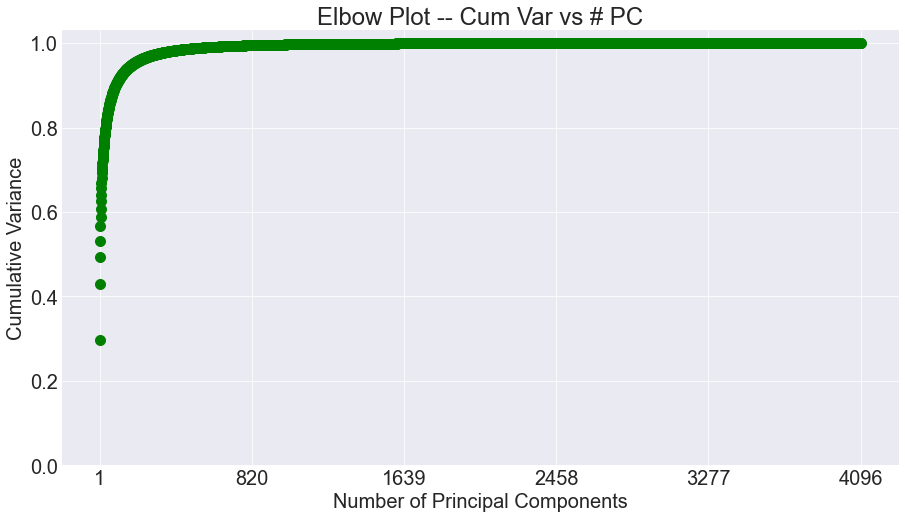

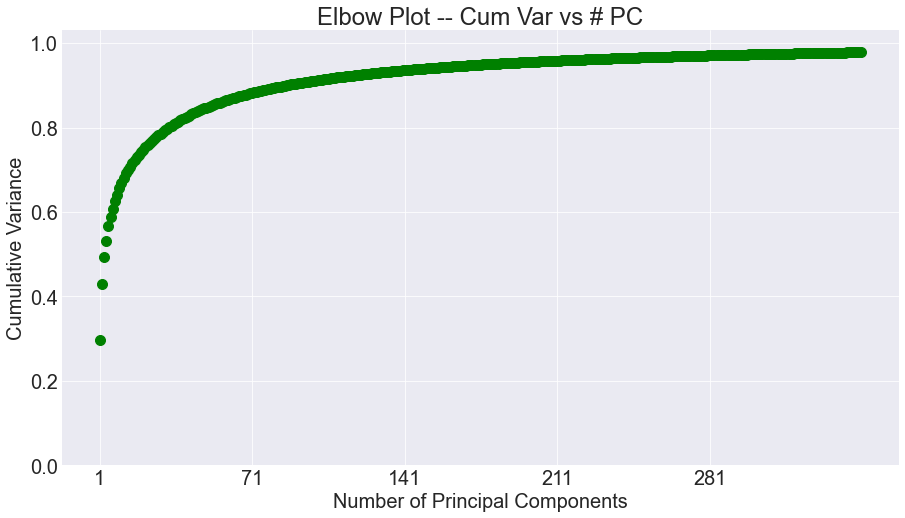

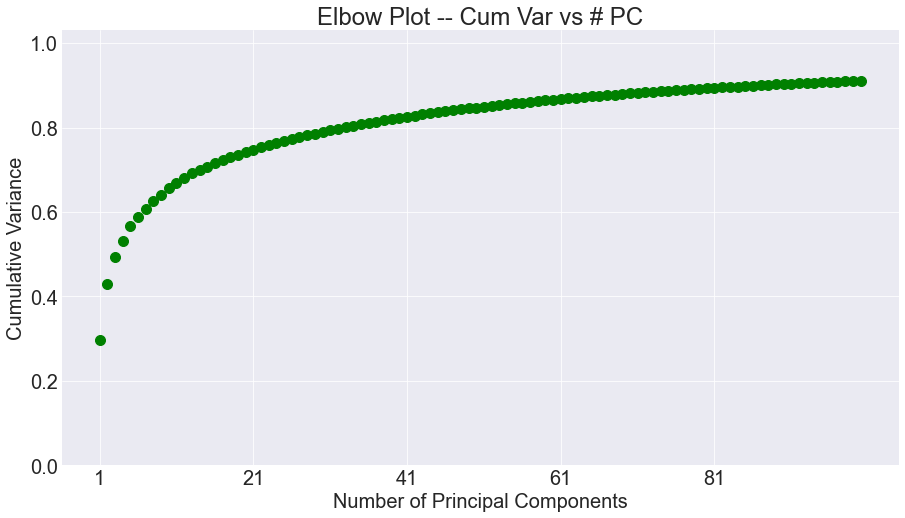

In [209]:
#elbow plot
face_pca.elbow_plot()
plt.show()

#second plot
face_pca.elbow_plot(350)
plt.show()

#refined
face_pca.elbow_plot(100)
plt.show()

### 2g) Reconstruct faces using the principal components

Using elbow plot to find the number of top principal components required to explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%



In [210]:
def make_imgs(reconstucted_imgs):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    return reconstucted_imgs.reshape(reconstucted_imgs.shape[0], int(np.sqrt(reconstucted_imgs.shape[1])), int(np.sqrt(reconstucted_imgs.shape[1])))

#### 50% variance face grid

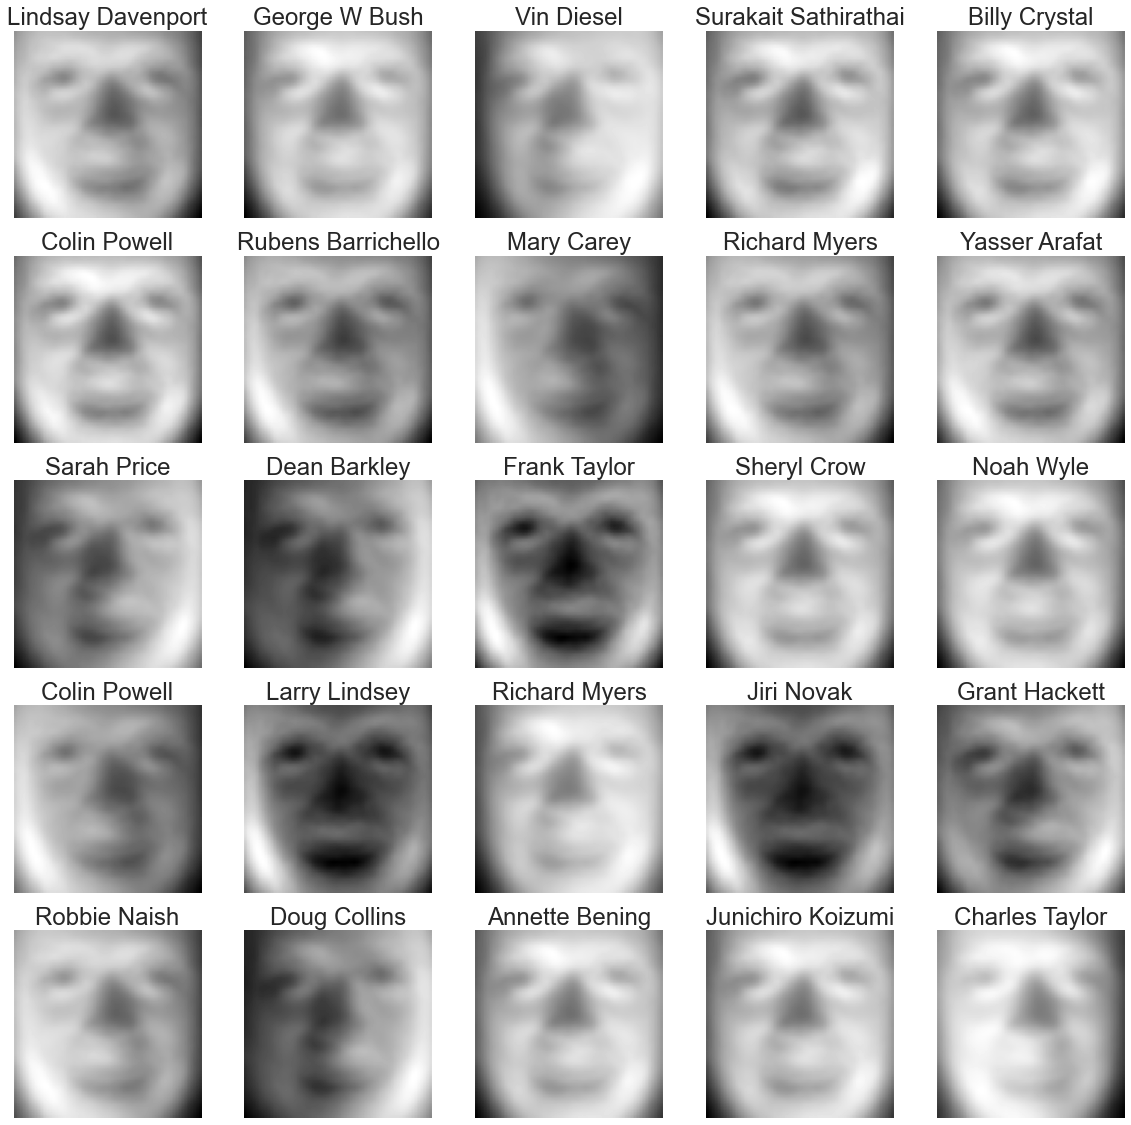

In [213]:
# assuming 3 PCs give 50% of variance

face_pca.pca_project(range(3))
projected_back = face_pca.pca_then_project_back(3)
reconstructed_imgs = make_imgs(projected_back)
reconstructed_imgs = reconstructed_imgs.astype(float)
face_plot(reconstructed_imgs, face_names)

#### 70% variance face grid

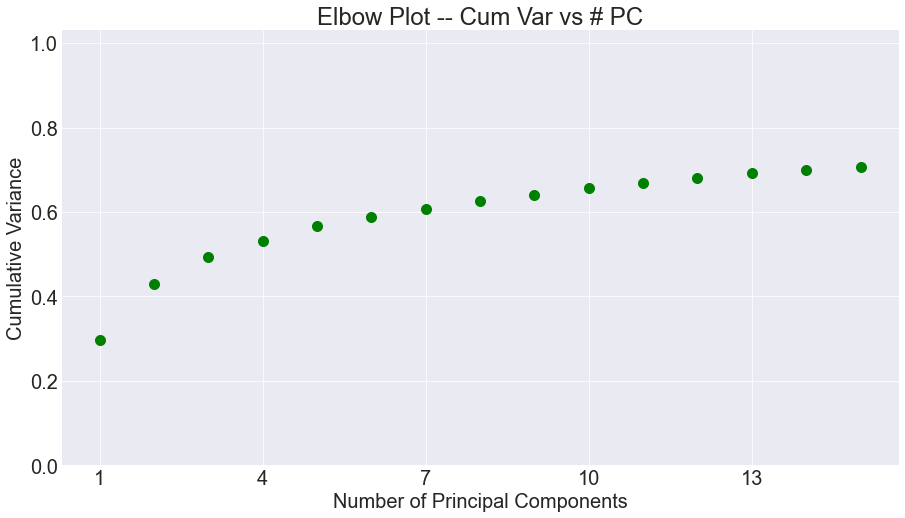

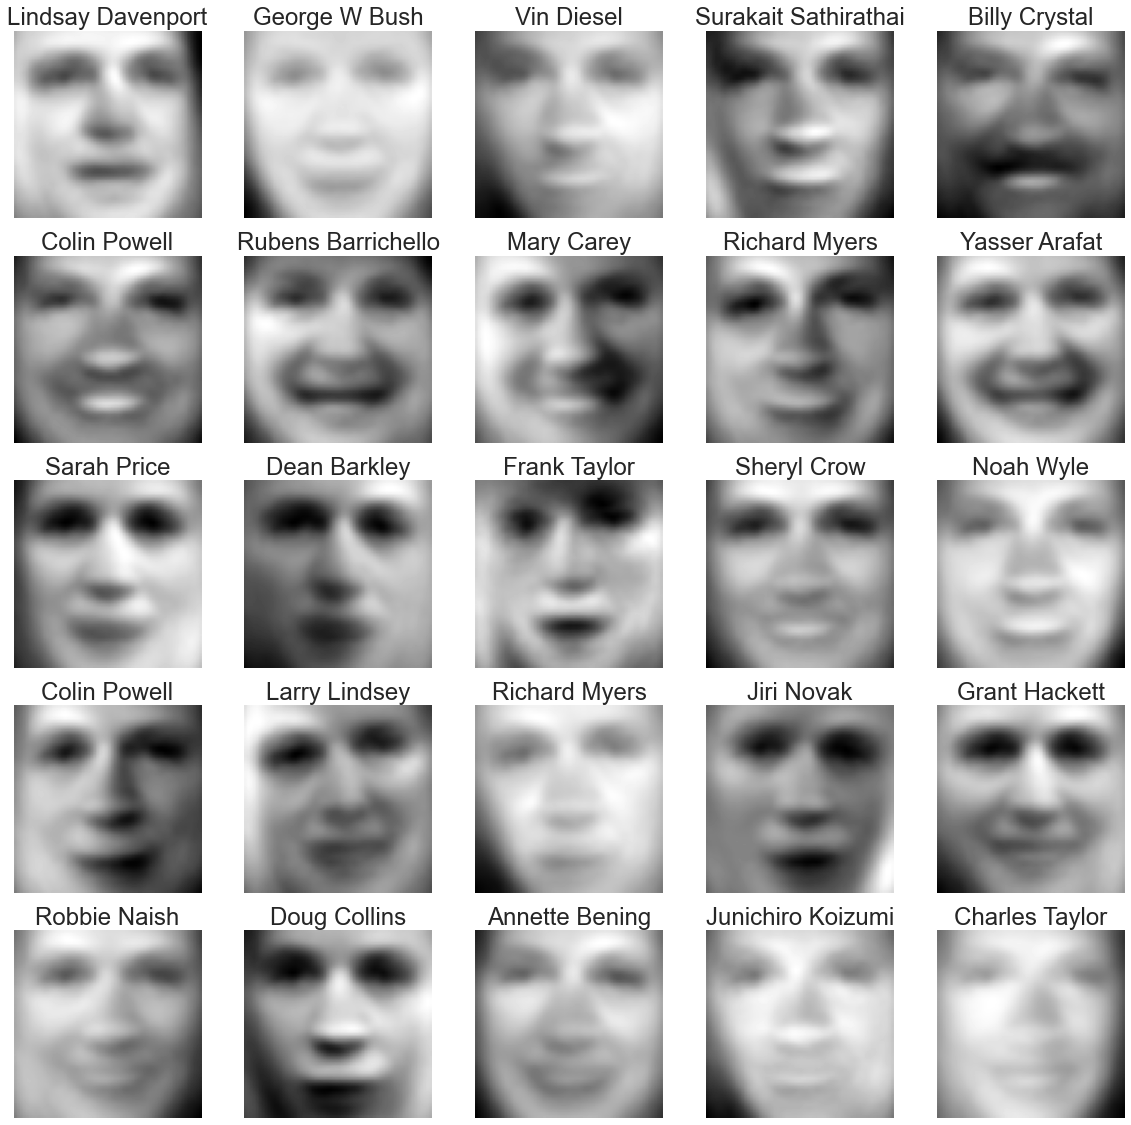

In [212]:
#To find at 70%
face_pca.elbow_plot(15)
plt.show()

#assuming that there are 14 PCs to give 70% variance

face_pca.pca_project(range(14))
projected_back = face_pca.pca_then_project_back(14)
reconstructed_imgs = make_imgs(projected_back)
reconstructed_imgs = reconstructed_imgs.astype(float)
face_plot(reconstructed_imgs, face_names)

#### 80% variance face grid

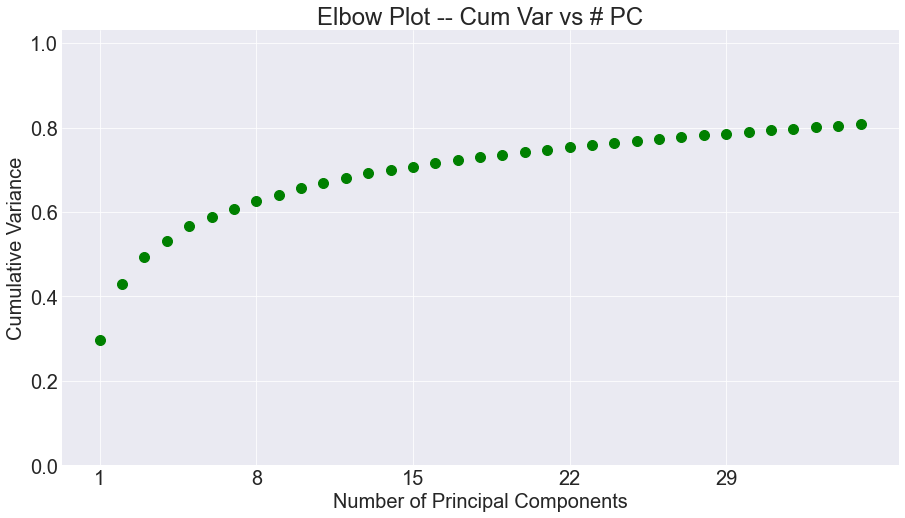

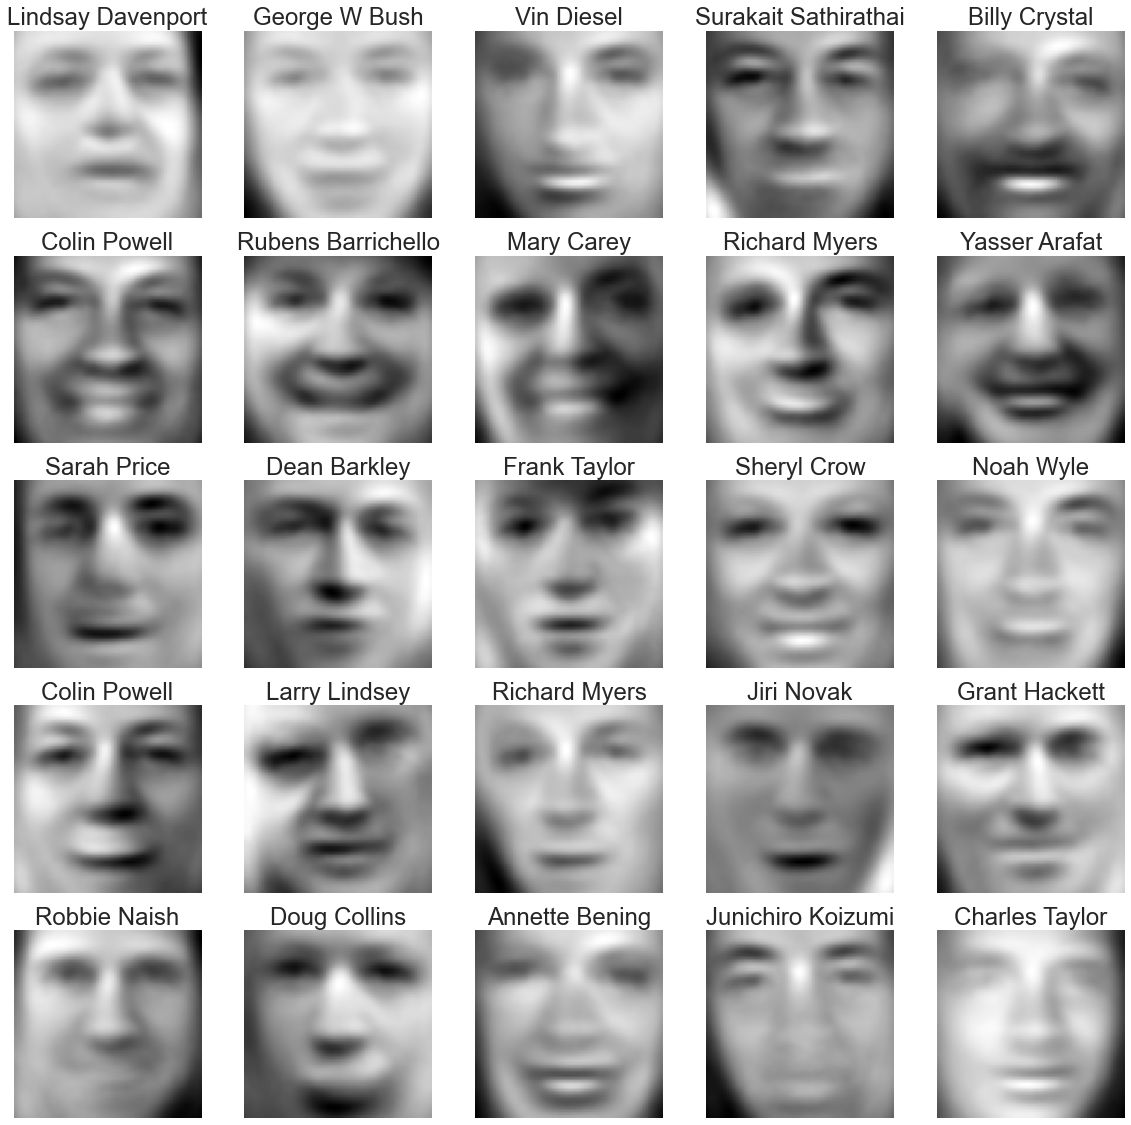

In [214]:
#to find how many PCs give 80% variance
face_pca.elbow_plot(35)
plt.show()

#assuming 80% variance is given bby 33 PCs
face_pca.pca_project(range(33))
projected_back = face_pca.pca_then_project_back(33)
reconstructed_imgs = make_imgs(projected_back)
reconstructed_imgs = reconstructed_imgs.astype(float)
face_plot(reconstructed_imgs, face_names)

#### 95% variance face grid

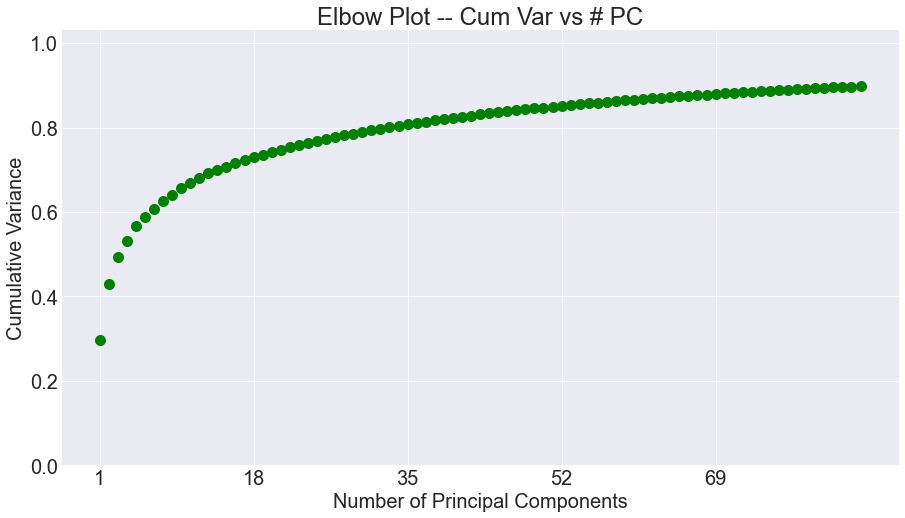

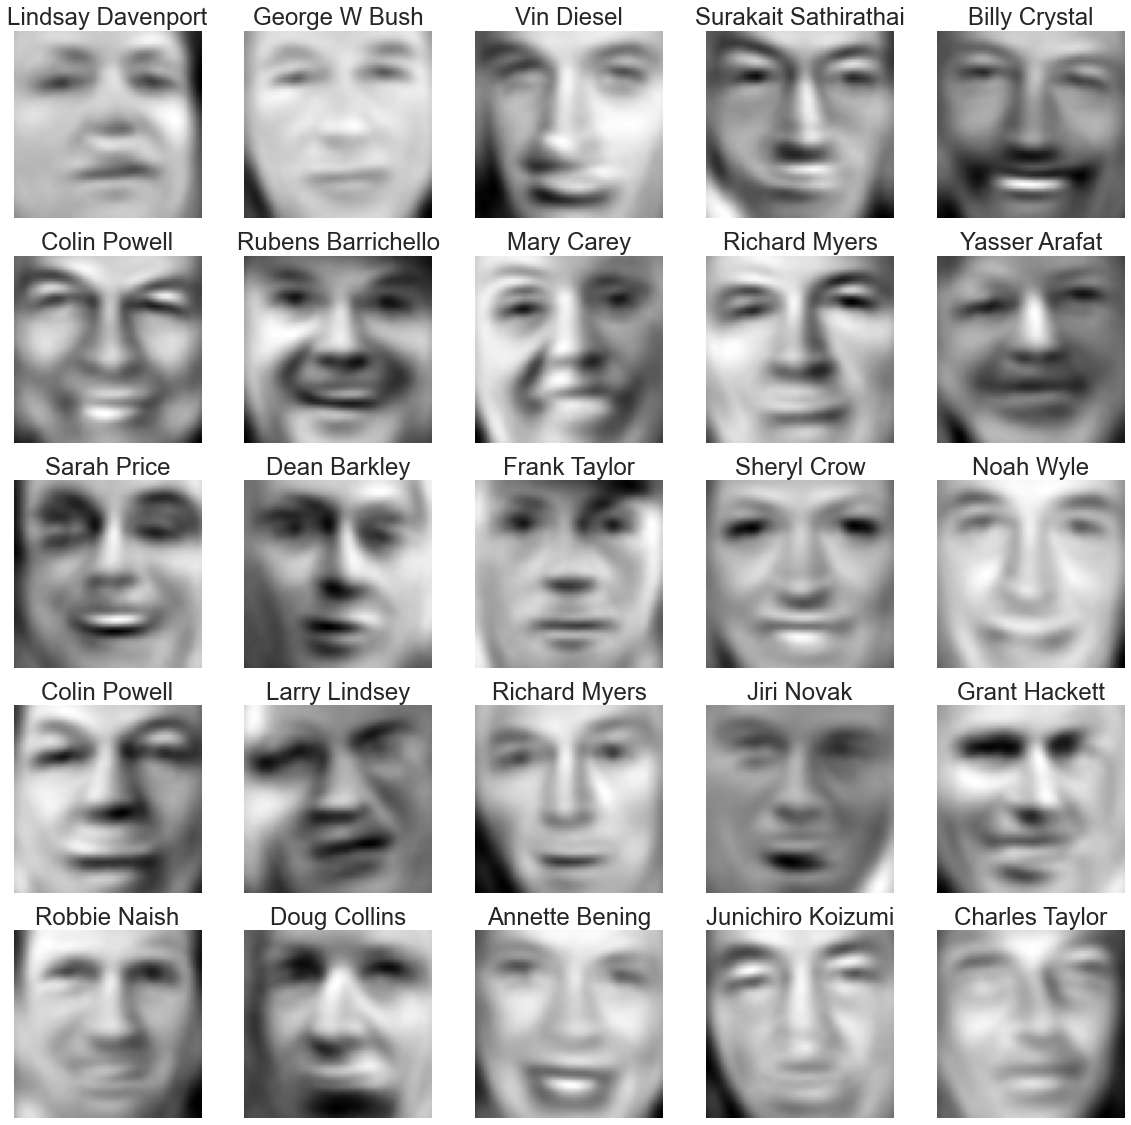

In [215]:
#To find at 90%
face_pca.elbow_plot(85)
plt.show()

#assuming that there are 85 PCs to give 90% variance

face_pca.pca_project(range(85))
projected_back = face_pca.pca_then_project_back(85)
reconstructed_imgs = make_imgs(projected_back)
reconstructed_imgs = reconstructed_imgs.astype(float)
face_plot(reconstructed_imgs, face_names)



For each of the above proportions of variances, I chose the number of PCs based on the elbow plot. That number of PCs is the number of axes in the PCA space that the data is projected into and back out of. With more PCs and more variance explained, the more information is kept. With 70% variance explained, 30% of the information conveyed in the data is lost. That is why as the proportion of variance explained increases, the more focused and clear the images appear. By the time we are at 90% of variance explained, we can see basically identify the people. 

## Extensions



### Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.

Facial Recognition with Eigenfaces Extension

For this extension, I implemented facial recognition using eigenfaces

- first, I use the first 101 images to "train" the model --> for speed reasons, only looking for matches on first 101 images
- then, I chose image 111, George W Bush, as my query
- following the instructions above, I printed the name of the image with the closest distance to the projected query image, which happens to be George W Bush
- then, based on my results, I was able to choose a baseline threshold. I then used this to create a "recognize" function that does facial recogntion all at once rather than in steps
- then, I tested this function
- lastly, created another function which is the same as recognize except it returns the worst match, rather than the best or none
- Tested this

In [67]:
#perform PCA on images of faces
face_imgs_vec = face_imgs.reshape((face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2]))

#deleting all but 101 the rows to make it faster
rows_to_del = range(100, len(face_imgs_vec) - 1)
face_imgs_vec = np.delete(face_imgs_vec, rows_to_del, 0)
print (face_imgs_vec.shape)

(101, 4096)


In [68]:
#perform PCA on face images
face_df = pd.DataFrame(face_imgs_vec)
face_pca = pca_cov.PCA_COV(face_df)
face_pca.pca(range(face_imgs_vec.shape[1]))


In [72]:
print(face_names[111])
#George W Bush at index 111 is now my query image
query = face_imgs[111].reshape(1,4096)

George W Bush


In [137]:
#project the query image

#get the eigen vectors from face_pca
e_vecs = face_pca.e_vecs
pcs_to_keep = 85
#restrict # of eigenvectors
cols_to_del = range(85, e_vecs.shape[1])
v = np.delete(e_vecs, cols_to_del, 1)
#project
projected_query = query@v


In [138]:
#now, project the first 101 images into the same space
projected_faces = face_pca.pca_project2(pcs_to_keep)

In [139]:
def edist(v1, v2):
    '''
    computes the euclidean distance between two vectors
    '''
    if (len(v1) != len(v2)):
        print("Vectors need to be the same length!!")
        return

    sum = 0
    for i in range(len(v1)):
        sum += (v1[i] - v2[i])**2

    return np.sqrt(sum)

In [140]:
#testing euclidean distance function
v1 = np.array([1,2,3])
v2 = np.array([22,4,6])
print(edist(v1,v2))
#used this calucator to check: https://www.calculatorsoup.com/calculators/geometry-solids/distance-two-points.php
print("distance should be 21.307276")

21.307275752662516
distance should be 21.307276


In [141]:
#finding the best match
# print(projected_query)
projected_query = projected_query.reshape(85,)
best_ind = 0
# projected_face = projected_faces[0].reshape((1,85))
best_val = edist(projected_query, projected_faces[0])

for i in range(101):
    # projected_face = projected_faces[i].reshape((1,85))
    new_val = edist(projected_query, projected_faces[i])
    if (new_val<2500):
        print("HERE")
    if new_val < best_val:
        best_val = new_val
        best_ind = i

print(best_ind)
print(face_names[best_ind])

HERE
HERE
HERE
HERE
HERE
87
George W Bush


The "HERE" print statements above were implemented to choose threshold. It was printed 5 times and there are 5 George W Bushes in the first 101 images

Creating a function as a culmination of the above code, then testing

In [220]:
def recognize(query_img, num_imgs, threshold = 2500, pcs_to_keep = 85):
    '''
    returns name of match if there is one
    parameters: 
    query_img --> the integer value of the image
    num_imgs --> the number of images including in "training part of data"
    '''
    if(query_img <= num_imgs):
        print("Please choose an index outside of your training set")
        return
    print("The person you are looking for is:")
    print(face_names[query_img])

    #perform PCA on images of faces
    face_imgs_vec = face_imgs.reshape((face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2]))

    #deleting rows
    rows_to_del = range(num_imgs - 1, len(face_imgs_vec) - 1)
    face_imgs_vec = np.delete(face_imgs_vec, rows_to_del, 0)
    
    #perform PCA on face images
    face_df = pd.DataFrame(face_imgs_vec)
    face_pca = pca_cov.PCA_COV(face_df)
    face_pca.pca(range(face_imgs_vec.shape[1]))

    query = face_imgs[query_img].reshape(1,4096)

    #project query
    e_vecs = face_pca.e_vecs
    #restrict # of eigenvectors to pcs_to_keep
    cols_to_del = range(pcs_to_keep, e_vecs.shape[1])
    v = np.delete(e_vecs, cols_to_del, 1)

    #project and reshape
    projected_query = query@v
    projected_query = projected_query.reshape(pcs_to_keep,)

    #project all the images we've included
    projected_faces = face_pca.pca_project2(pcs_to_keep)
    
    #Now, to find match
    best_ind = 0
    best_val = edist(projected_query, projected_faces[0])

    for i in range(num_imgs):
        new_val = edist(projected_query, projected_faces[i])
        if new_val < best_val:
            best_val = new_val
            best_ind = i

    #if the distance is less than threshold
    if(best_val < threshold):
        print("Your match is:")
        return(face_names[best_ind])
    #if the disntace is greater than threshold
    return("No match found")
    

    
    
    

Testing recognize function:

Testing with the same exact hyper parameters as when didn't use recognize function:

In [160]:
#testing recognize
print(recognize(111, 101))

The person you are looking for is:
George W Bush
Your match is:
George W Bush


Testing with George HW Bush:
- needed to lower the threshold to get the correct "no match" result
- Honestly, I can see the resemblance between George HW Bush and Rubens Barrichello

In [161]:
#testing recognize with George HW Bush (not in first 101)
print(recognize(284, 101))

The person you are looking for is:
George HW Bush
Your match is:
Rubens Barrichello


In [218]:
#testing recognize with George HW Bush (not in first 101), lowering the threshold
#this code also prints the index (6) of Rubens Barrichello that it says is match so that we can show the images
print(recognize(284, 101, 2000))

The person you are looking for is:
George HW Bush
Your match is:
6
Rubens Barrichello


In [163]:
#testing recognize with George HW Bush (not in first 101), lowering the threshold
print(recognize(284, 101, 1500))

The person you are looking for is:
George HW Bush
No match found


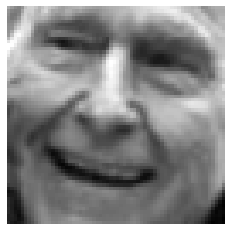

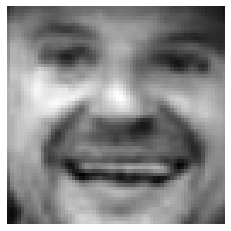

In [221]:
#showing the pictures of George HW Bush and Rubens Barrichello

plt.imshow(face_imgs[284], cmap=plt.get_cmap('gray'))

plt.yticks([])
plt.xticks([])
plt.show()

plt.imshow(face_imgs[6], cmap=plt.get_cmap('gray'))

plt.yticks([])
plt.xticks([])
plt.show()

One last test with Colin Powell

In [164]:
#testing recognize with someone other than a George
print(recognize(876, 101))

The person you are looking for is:
Colin Powell
Your match is:
Colin Powell


Worst match function

In [222]:
def worst_match(query_img, num_imgs, threshold = 2500, pcs_to_keep = 85):
    '''
    returns name of worst match
    parameters: 
    query_img --> the integer value of the image
    num_imgs --> the number of images including in "training part of data"
    '''
    if(query_img <= num_imgs):
        print("Please choose an index outside of your training set")
        return
    print("The person you are looking for is:")
    print(face_names[query_img])

    #perform PCA on images of faces
    face_imgs_vec = face_imgs.reshape((face_imgs.shape[0], face_imgs.shape[1]*face_imgs.shape[2]))

    #deleting rows
    rows_to_del = range(num_imgs - 1, len(face_imgs_vec) - 1)
    face_imgs_vec = np.delete(face_imgs_vec, rows_to_del, 0)
    
    #perform PCA on face images
    face_df = pd.DataFrame(face_imgs_vec)
    face_pca = pca_cov.PCA_COV(face_df)
    face_pca.pca(range(face_imgs_vec.shape[1]))

    query = face_imgs[query_img].reshape(1,4096)

    #project query
    e_vecs = face_pca.e_vecs
    #restrict # of eigenvectors to pcs_to_keep
    cols_to_del = range(pcs_to_keep, e_vecs.shape[1])
    v = np.delete(e_vecs, cols_to_del, 1)

    #project and reshape
    projected_query = query@v
    projected_query = projected_query.reshape(pcs_to_keep,)

    #project all the images we've included
    projected_faces = face_pca.pca_project2(pcs_to_keep)
    
    #Now, to find match
    worst_ind = 0
    worst_val = edist(projected_query, projected_faces[0])

    for i in range(num_imgs):
        new_val = edist(projected_query, projected_faces[i])
        if new_val > worst_val:
            worst_val = new_val
            worst_ind = i

    print(worst_ind)
    print("Your worst match is:")
    return(face_names[worst_ind])

    

    
    
    

In [223]:
#testing worst_match
#also print index of worst match so we can look at them
print(worst_match(111, 101))

The person you are looking for is:
George W Bush
10
Your worst match is:
Sarah Price


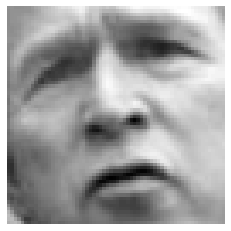

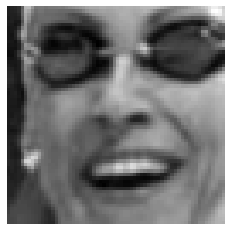

In [226]:
#showing the pictures of George HW Bush and Sarah Price --> this makes sense because of her goggles!

plt.imshow(face_imgs[111], cmap=plt.get_cmap('gray'))

plt.yticks([])
plt.xticks([])
plt.show()

plt.imshow(face_imgs[10], cmap=plt.get_cmap('gray'))

plt.yticks([])
plt.xticks([])
plt.show()